# **Aprendizaje no supervisado: agrupamiento**
---
En esta tarea podrá practicar las habilidades y conceptos adquiridos aplicando métodos de agrupamiento, en la caracterización de cuentas bancarias como posibles buenos o malos riesgos de crédito. Utilizaremos el conjunto de datos [**German Credit Data**](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29), atribuido al profesor Hans Hoffman


| Variable | Medida	| Valores |
| --- | --- | --- |
| checking_status | 	Estado de la cuenta corriente. |	categórica |
| disc_duration |  Duración en meses del crédito solicitado | 	numérica
| credit_history | Historial crediticio. 	| categórica |
| purpose |	Propósito del crédito. 	| categórica |
| credit_amount |	Monto del crédito en marcos alemanes (DM). | numérica |
| savings_status |	Estado de cuenta/bonos de ahorros. 	| categórica|
| employment |	 Tiempo de empleo. 	| categórica |
| personal_status |	Estado personal (género y estado civil). 	| categórica |
| other_parties |	Otros deudores/garantes. 	| categórica |
| property_magnitude |	Tipo de propiedad. 	| categórica |
| age |	Edad del solicitante en años.	| numérica |
| other_payment_plans  |	 Otros planes de pago. 	| categórica|
| housing |	Tipo de alojamiento/vivienda. 	| categórica|
| existing_credits |	Cantidad de créditos existentes. 	| categórica|
| job |	Tipo de empleo y habilidad. 	| categórica|
| num_dependents |	Número de dependientes. 	| categórica|
| own_telephone |	Teléfono propio. 	| categórica |
| foreign_worker |	Trabajador extranjero. 	| categórica |
| class |	Tipo de riesgo de crédito. 	| categórica - variable objetivo ('good', 'bad')|]





## **0. Dependencias**
---
Ejecute la siguiente celda para importar las librerías necesarias.

In [ ]:
# Importamos Scikit-Learn.
import sklearn

# Librerías de utilidad para manipulación de datos.
import pandas as pd
import numpy as np
import scipy

# Ignorar advertencias del código.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#TEST_CELL
# Librerías de utilidad para visualización de datos.
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos el formato por defecto de la
# librería de visualización Matplotlib.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 110
mpl.rcParams['figure.figsize'] = (8, 6)
sns.set_theme()

In [ ]:
#TEST_CELL
# Versiones de las librerías usadas.

!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('SciPy', scipy.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)
print('Scikit-learn', sklearn.__version__)

Python 3.10.12
NumPy 1.25.2
Pandas 2.0.3
SciPy 1.11.4
Matplotlib 3.7.1
Seaborn 0.13.1
Scikit-learn 1.2.2


Esta actividad se realizó con las siguientes versiones:
*  *Python*: 3.7.10
*  *NumPy*:  1.19.5
*  *Pandas*: 1.1.5
*  *SciPy*: 1.4.1
*  *Matplotlib*:  3.2.2
*  *Seaborn*:  0.11.1
*  *Scikit-learn*: 0.22.2.post1

Descargamos el conjunto de datos:

In [ ]:
#TEST_CELL
!wget 'https://raw.githubusercontent.com/JuezUN/datasets/master/credit-german.csv'

--2024-04-09 05:19:12--  https://raw.githubusercontent.com/JuezUN/datasets/master/credit-german.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138139 (135K) [text/plain]
Saving to: ‘credit-german.csv’

credit-german.csv   100%[===================>] 134.90K  --.-KB/s    in 0.02s   

2024-04-09 05:19:12 (5.95 MB/s) - ‘credit-german.csv’ saved [138139/138139]



Y lo cargamos con _Pandas_:

> **Nota**: El archivo **`'credit-german.csv'`** estará en el ambiente de _UNCode_, no se preocupe por ello.

In [ ]:
credit_german_df = pd.read_csv('credit-german.csv', sep=';')

Visualizamos información básica del *DataFrame*:

In [ ]:
#TEST_CELL
credit_german_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   checking_status      1000 non-null   object
 1   disc_duration        1000 non-null   int64 
 2   credit_history       1000 non-null   object
 3   purpose              1000 non-null   object
 4   credit_amount        1000 non-null   int64 
 5   savings_status       1000 non-null   object
 6   employment           1000 non-null   object
 7   personal_status      1000 non-null   object
 8   other_parties        1000 non-null   object
 9   property_magnitude   1000 non-null   object
 10  age                  1000 non-null   int64 
 11  other_payment_plans  1000 non-null   object
 12  housing              1000 non-null   object
 13  existing_credits     1000 non-null   object
 14  job                  1000 non-null   object
 15  num_dependents       1000 non-null   object
 16  own_tel

Y revisamos los valores de unos cuantos ejemplos:

In [ ]:
#TEST_CELL
credit_german_df.head(5)

,checking_status,disc_duration,credit_history,purpose,credit_amount,savings_status,employment,personal_status,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing,radio/tv,1169,no known savings,>=7,male single,none,real estate,67,none,own,two,skilled,one,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,female div/dep/mar,none,real estate,22,none,own,one,skilled,one,none,yes,bad
2,no checking,12,critical/other existing,education,2096,<100,4<=X<7,male single,none,real estate,49,none,own,one,unskilled resident,two,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,male single,guarantor,life insurance,45,none,for free,one,skilled,two,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,male single,none,no known property,53,none,for free,two,skilled,two,none,yes,bad


Usando la utilidad de *Pandas* **`select_dtypes`** podemos fácilmente tomar las columnas que correspondan a variables categóricas. De esta manera, podemos verificar los valores posibles para cada una de estas con la siguiente celda:

In [ ]:
#TEST_CELL
categoric_df = credit_german_df.select_dtypes(['object'])

print('Características categóricas y valores únicos')
for col in categoric_df.columns:
  print(f'\nCaracterística {col}')
  for i, val in enumerate(categoric_df[col].unique()):
    print(f"\t{i + 1}. {val}")

Características categóricas y valores únicos

Característica checking_status
	1. <0
	2. 0<=X<200
	3. no checking
	4. >=200

Característica credit_history
	1. critical/other existing 
	2. existing paid
	3. delayed previously
	4. no credits/all paid
	5. all paid

Característica purpose
	1. radio/tv
	2. education
	3. furniture/equipment
	4. new car
	5. used car
	6. business
	7. domestic appliance
	8. repairs
	9. other
	10. retraining

Característica savings_status
	1. no known savings
	2. <100
	3. 500<=X<1000
	4. >=1000
	5. 100<=X<500

Característica employment
	1. >=7
	2. 1<=X<4
	3. 4<=X<7
	4. unemployed
	5. <1

Característica personal_status
	1. male single
	2. female div/dep/mar
	3. male div/sep
	4. male mar/wid

Característica other_parties
	1. none
	2. guarantor
	3. co applicant

Característica property_magnitude
	1. real estate
	2. life insurance
	3. no known property
	4. car

Característica other_payment_plans
	1. none
	2. bank
	3. stores

Característica housing
	1. own
	2. for fre

## **1. Separe el conjunto de datos en la forma `X, y`**
---

El conjunto de datos cuenta con la característica **`class`**, la cual contiene los valores **`"good"`** y **`"bad"`**, representando la decisión de dar o no el crédito con base a los antecedentes personales y crediticios de cada persona. En este caso nos interesa analizar el desempeño de los agrupamientos de manera externa basados en esta característica.

Complete la función **`separar_X_y`** de tal manera que retorne una tupla **`X, y`** que corresponda al conjunto de datos en la forma $X, y$, con **`y`** siendo la variable objetivo.

**Entrada:**
* **`df`**: objeto *DataFrame* de *Pandas* con el conjunto de datos *German Credit Data*.

**Salida**
* **`X`:** objeto _DataFrame_ con la matriz de datos, excluyendo la columna **`class`**.
* **`y`:** objeto _Series_ con el vector de etiquetas reales contenido en la columna **`class`**.


In [ ]:
# FUNCIÓN CALIFICADA separar_X_y:

def separar_X_y(df):
  """
    Entradas:
      df: objeto DataFrame del conjunto de datos German Credit Data.
    Retorna:
      X: objeto DataFrame con la matriz de datos de entrada.
      y: objeto Series con el vector de etiquetas reales.

      X debe ser un DataFrame y y una Series de Pandas.
  """
  ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 2 líneas de código)

  X = df.loc[:, df.columns != 'class']
  y = df.loc[:, ["class"]].squeeze()

  ### FIN DEL CÓDIGO ###

  return X, y

In [ ]:
#TEST_CELL
X, y = separar_X_y(credit_german_df)

print(f'Tamaño de X: {X.shape}')
print(f'Tamaño de y: {y.shape}')

Tamaño de X: (1000, 18)
Tamaño de y: (1000,)


**Salida esperada:**

```
Tamaño de X: (1000, 18)
Tamaño de y: (1000,)
```

In [ ]:
#TEST_CELL
X, y = separar_X_y(credit_german_df)

print(f'Tipo de X: {type(X)}')
print(f'Tipo de y: {type(y)}')

Tipo de X: <class 'pandas.core.frame.DataFrame'>
Tipo de y: <class 'pandas.core.series.Series'>


**Salida esperada:**

```
Tipo de X: <class 'pandas.core.frame.DataFrame'>
Tipo de y: <class 'pandas.core.series.Series'>
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista</b></font>
</summary>
<p>

* Puede guardar la columna **`class`**  en una variable y luego usar el método **`drop`** del objeto *DataFrame* de la columna para retornar el subconjunto apropiado.
    


## **2. Codifique las etiquetas en valores binarios**
---
La variable **`class`**, ahora contenida en el arreglo **`y`**, contiene únicamente los valores **`'good'`** y **`'bad'`**:

In [ ]:
#TEST_CELL
print(credit_german_df.loc[:20, 'class'].values)

['good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'bad'
 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good']


Antes de realizar una evaluación del desempeño externa debemos codificar **`good`** como el número $1$ y **`bad`** como el número $0$. Complete la función **`codificar`** de tal manera que retorne un arreglo de _NumPy_ con las etiquetas codificadas en valores binarios.

**Entrada:**

* **`y_txt`**: serie de _Pandas_ de tamaño $n$ con las cadenas de texto **`good`** y **`bad`**.

**Salida:**

* **`y_num`**: arreglo de _NumPy_ de tamaño $n$ con los valores numéricos $0$ y $1$.

In [ ]:
# FUNCIÓN CALIFICADA bin_X_y:

def codificar(y_txt):
  """
    Entradas
      y_txt: serie de Pandas con las etiquetas en valores `good` y `bad`.
    Retorna
      y_num: arreglo de NumPy con 'good' codificado como 1 y 'bad' codificado como 0.
  """
  ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 2 líneas de código)

  y_num = y_txt.map(lambda x: 1 if format(x) == 'good'else 0, na_action=None)


  ### FIN DEL CÓDIGO ###
  return np.array(y_num)

Ejecute la siguiente celda para probar su código:

> **Nota:** Asegúrese de que el ejercicio $1$ retorne un resultado correcto antes de evaluar este punto.

In [ ]:
#TEST_CELL
# 1. Separar el conjunto de datos en la forma X, y.
_, y_raw = separar_X_y(credit_german_df)
assert isinstance(y_raw, pd.Series) and y_raw.shape == (1000, ), "Ej 1. Revise el resultado del ejercicio 1."

y_encoded = codificar(y_raw)

if isinstance(y_encoded, np.ndarray) and y_encoded.shape[0] > 0:
  for i in range(85, 95):
    print(f'Valor: {y_raw[i]}\tCodificado: {y_encoded[i]}')

else: print("El valor retornado no es un arreglo de NumPy válido.")

Valor: good	Codificado: 1
Valor: good	Codificado: 1
Valor: bad	Codificado: 0
Valor: good	Codificado: 1
Valor: bad	Codificado: 0
Valor: good	Codificado: 1
Valor: good	Codificado: 1
Valor: bad	Codificado: 0
Valor: good	Codificado: 1
Valor: good	Codificado: 1


**Salida esperada**:

```
Valor: good	   Codificado: 1
Valor: good	   Codificado: 1
Valor: bad	    Codificado: 0
Valor: good	   Codificado: 1
Valor: bad	    Codificado: 0
Valor: good	   Codificado: 1
Valor: good	   Codificado: 1
Valor: bad	    Codificado: 0
Valor: good	   Codificado: 1
Valor: good	   Codificado: 1
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>
<p>

* Puede declarar una función o usar una [expresión lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions) para mapear los datos con el método [**`map`**](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html) del objeto *Series* de *Pandas*.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>


* Otra alternativa es crear un nuevo arreglo de _NumPy_ con el tamaño deseado, iterar sobre **`y`** y asignar los valores correspondientes al nuevo arreglo.


## **3. Preprocese las variables categóricas y numéricas.**
---

Para aplicar el modelo $k$ _means_, es muy importante contar con únicamente variables numéricas con una escala común. Para esto, vamos a aplicar una transformación a variables categóricas y numéricas de la siguiente forma:

* Para las variables categóricas se debe aplicar el algoritmo **`OneHotEncoder`** para expandir cada categoría a una columna numérica binaria independiente.

* Para las variables numéricas se debe aplicar un reescalado con **`StandardScaler`** para delimitar los valores a una escala común, con media en $0$ y desviación estándar de $1$ unidad.

En este caso, deberá usar **`ColumnTransformer`** para aplicar ambas transformaciones de manera simultánea. Al hacer esto, deberá usar la cadena **`'onehot'`** para representar la primera transformación y **`'scaler'`** para representar la segunda.

Complete la función **`preprocesar`** de tal manera que tome el _DataFrame_ **`X`** y retorne un arreglo de _NumPy_ con la matriz de datos preprocesada y el objeto **`ColumnTransformer`** usado para preprocesar los datos.

> **Nota**: Las características categóricas deben estar antes que las características numéricas. Es decir, la primera tupla de las transformaciones que recibe **`ColumnTransformer`** debe ser aquella que utiliza *One Hot Encoder*.


**Entrada:**

* **`df`**: objeto _DataFrame_ de _Pandas_ de tamaño $(n, m)$ con variables categóricas (con _dtype_ **`'object'`**) y numéricas enteras (con _dtype_ **`'int64'`**).

**Salida:**

* **`X`**: matriz [_sparse_ de _SciPy_](https://docs.scipy.org/doc/scipy/reference/sparse.html) con tamaño $(n, m^\prime)$ únicamente valores numéricos, donde $m^\prime \geq m$.
* **`tf`**: objeto de tipo **`ColumnTransformer`** usado en el preprocesamiento de los datos, con los transformadores **`onehot`** y **`scaler`**.

In [ ]:
# FUNCIÓN CALIFICADA preprocesar:

# Funciones utilizadas en el ejercicio.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def preprocesar(df):
  """
    Entradas:
      df: objeto DataFrame con las características originales.
    Retorna:
      X: arreglo sparse de SciPy con el conjunto de datos preprocesado
      tf: objeto ColumnTransformer usado para preprocesar el conjunto de datos.
  """
  ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 5-6 líneas de código)

  X1 = df.select_dtypes(include='object') #Objetos categoricos
  X2 = df.select_dtypes(include='int64') #Objetos numericos
  tf = ColumnTransformer([('onehot', OneHotEncoder(), np.array(X1.columns).tolist()),
                        ('scaler', StandardScaler(), np.array(X2.columns).tolist()  )])
  X = tf.fit_transform(df)
  ### FIN DEL CÓDIGO ###

  return X, tf

Ejecute las siguientes celdas para probar su código:

In [ ]:
#TEST_CELL
# 1. Separar el conjunto de datos en la forma X, y.
X_raw, _ = separar_X_y(credit_german_df)
assert (isinstance(X_raw, pd.DataFrame) and X_raw.shape == (1000, 18)), "Ej 1. Revise el resultado del ejercicio 1."

X_preprocessed, tf = preprocesar(X_raw)
print(f'Tamaño de X_preprocessed: {X_preprocessed.shape}'
      if isinstance(X_preprocessed, scipy.sparse.csr.csr_matrix)
      else "El valor retornado no es una matriz sparse válida.")

Tamaño de X_preprocessed: (1000, 63)


**Salida esperada:**

```
Tamaño de X_preprocessed: (1000, 63)
```

In [ ]:
#TEST_CELL
# 1. Separar el conjunto de datos en la forma X, y.
X_raw, _ = separar_X_y(credit_german_df)
assert (isinstance(X_raw, pd.DataFrame) and X_raw.shape == (1000, 18)), "Ej 1. Revise el resultado del ejercicio 1."

X_preprocessed, tf = preprocesar(X_raw)

print(tf.named_transformers_.keys()
      if isinstance(X_preprocessed, scipy.sparse.csr.csr_matrix)
      else "El valor retornado no es una matriz sparse válida.")

dict_keys(['onehot', 'scaler'])


**Salida esperada:**

```
dict_keys(['onehot', 'scaler'])
```

In [ ]:
#TEST_CELL
# 1. Separar el conjunto de datos en la forma X, y.
X_raw, _ = separar_X_y(credit_german_df)
assert (isinstance(X_raw, pd.DataFrame) and X_raw.shape == (1000, 18)), "Ej 1. Revise el resultado del ejercicio 1."

X_preprocessed, tf = preprocesar(X_raw)

print('Primeros valores de X_preprocessed: ')
print(X_preprocessed[0]
      if isinstance(X_preprocessed, scipy.sparse.csr.csr_matrix)
      else "- El valor retornado no es una matriz sparse válida.")

Primeros valores de X_preprocessed: 
  (0, 1)	1.0
  (0, 5)	1.0
  (0, 15)	1.0
  (0, 23)	1.0
  (0, 27)	1.0
  (0, 32)	1.0
  (0, 35)	1.0
  (0, 39)	1.0
  (0, 41)	1.0
  (0, 44)	1.0
  (0, 49)	1.0
  (0, 51)	1.0
  (0, 54)	1.0
  (0, 57)	1.0
  (0, 59)	1.0
  (0, 60)	-1.2364778603818776
  (0, 61)	-0.7451314133870967
  (0, 62)	2.7664564848025224


**Salida esperada**:
> **Nota:** Note que la salida es distinta a la que tendría un arreglo normal. Esto es debido a que el transformador **`OneHotEncoder`** retorna por defecto una matriz de tipo ["_dispersa_" o *sparse* de _SciPy_](https://docs.scipy.org/doc/scipy/reference/sparse.html). Esta es usada cuando la matriz que representa está compuesta por una gran cantidad de valores en $0$, como en el caso de _One Hot Encoder_.

```
  (0, 1)	1.0
  (0, 5)	1.0
  (0, 15)	1.0
  (0, 23)	1.0
  (0, 27)	1.0
  (0, 32)	1.0
  (0, 35)	1.0
  (0, 39)	1.0
  (0, 41)	1.0
  (0, 44)	1.0
  (0, 49)	1.0
  (0, 51)	1.0
  (0, 54)	1.0
  (0, 57)	1.0
  (0, 59)	1.0
  (0, 60)	-1.2364778603818776
  (0, 61)	-0.7451314133870967
  (0, 62)	2.7664564848025224
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>
<p>

* Use el método **`select_dtypes([dtype])`** para obtener un _DataFrame_ con sólo las variables que correspondan con el tipo indicado en la variable **`dtype`**. En este caso, puede considerar que las variables categóricas tienen _dtype_ **`object`** y las numéricas, al tener todas valores enteros, dtype **`int64`**.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

* El atributo **`columns`** de un *DataFrame* permite acceder a los nombres de las columnas. Esto será de utilidad al indicar las columnas que deben ser consideradas por cada transformador de **`ColumnTransformer`**.  


## **4. Obtenga el porcentaje de ejemplos con clase `good` de cada grupo.**
---
Dado el propósito original del análisis de distinguir entre clientes con buen riesgo y mal riesgo, vamos a realizar un modelo no supervisado de agrupamiento $k$-_means_ con $k$ igual a $2$. A partir de este queremos evaluar la tendencia de cada grupo a ser aceptado o rechazado por la entidad que emite el crédito, según los datos de la caracterización real. Para esto vamos a realizar el análisis de cada grupo obtenido de manera no supervisada, calculando el porcentaje de sus registros que fueron etiquetados con riesgo real **`'good'`**.

Complete la función **`proporcion_cluster`** de tal manera que reciba las etiquetas reales codificadas, las etiquetas de grupo del agrupamiento, un número **`i`** y retorne el porcentaje de ejemplos en el $i$-ésimo grupo con clase **`'good'`**.

**Entrada:**

* **`model`**: modelo de agrupamiento **`KMeans`** entrenado con $2$ grupos.
* **`X`**: arreglo sparse de _SciPy_ o regular de _NumPy_ con la matriz de datos reales sobre la cual realizar la predicción del agrupamiento.
* **`y`**: arreglo de _NumPy_ con el vector de etiquetas reales, donde el valor $1$ corresponde a la categoría **`'good'`** y $0$ a la categoría **`'bad'`**.

**Salida:**

* **`ratios`**: lista de números reales de tamaño $k$ con el porcentaje de registros con valor $1$ (categoría **`'good'`**) de cada grupo.

In [ ]:
# FUNCIÓN CALIFICADA proporcion_cluster:

def proporcion_cluster(model, X, y):
  """
  Entradas:
    model: modelo KMeans entrenado con 2 grupos.
    X: arreglo sparse de SciPy o regular de NumPy con la matriz de datos preprocesados.
    y: arreglo de NumPy con shape (n,): las etiquetas reales 0 (bad) o 1 (good).
  Retorna:
    ratios: lista de porcentajes de créditos con etiqueta 1 (good) del i-esimo cluster.
  """
  y_pred=model.predict(X)
  ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 2-4 líneas de código)

  ratios =[]
  k=2
  for i in range(k):
    # Ejemplos que pertenecen al i-esimo grupo.
    ids_group = y_pred == i

    # Etiquetas reales de los ejemplos del grupo.
    labels_group = y[ids_group]

    # Calculamos la proporción como la media, pues consiste en valores con 0 y 1.
    ratio = np.round(np.mean(labels_group), 5)
    ratios.append(ratio)

  ### FIN DEL CÓDIGO ###
  return ratios

In [ ]:
#TEST_CELL
from sklearn.cluster import KMeans

# 1. Separar el conjunto de datos en la forma X, y.
X_raw, y_raw = separar_X_y(credit_german_df)
assert (isinstance(X_raw, pd.DataFrame) and isinstance(y_raw, pd.Series)
      and X_raw.shape == (1000, 18) and y_raw.shape == (1000, )), "Ej 1. Revise el resultado del ejercicio 1."

# 2. Codificación de las etiquetas en valores binarios
y = codificar(y_raw)
assert isinstance(y, np.ndarray) and y.shape[0] > 0, "Ej 2. Revise el resultado del ejercicio 2."

# 3. Preprocesamiento de la matriz de entrada.
X, _ = preprocesar(X_raw)
assert isinstance(X, scipy.sparse.csr.csr_matrix) and (X.shape[1] > X_raw.shape[1]),"Ej 3. Revise el resultado del ejercicio 3."

k = 2
model = KMeans(n_clusters= 2, random_state=24)
model.fit(X)

ratios = proporcion_cluster(model, X, y)
try:
  for i, ratio in enumerate(ratios):
    print(f'Grupo: {i}, porcentaje: {ratio:.5f}')
except Exception as e:
  print(e)
  print("El valor retornado no es un iterable válido.")

Grupo: 0, porcentaje: 0.74431
Grupo: 1, porcentaje: 0.56917


In [ ]:
#TEST_CELL
from sklearn.cluster import KMeans

# 1. Separar el conjunto de datos en la forma X, y.
X_raw, y_raw = separar_X_y(credit_german_df)
assert (isinstance(X_raw, pd.DataFrame) and isinstance(y_raw, pd.Series)
      and X_raw.shape == (1000, 18) and y_raw.shape == (1000, )), "Ej 1. Revise el resultado del ejercicio 1."

# 2. Codificación de las etiquetas en valores binarios
y = codificar(y_raw)
assert isinstance(y, np.ndarray) and y.shape[0] > 0, "Ej 2. Revise el resultado del ejercicio 2."

# 3. Preprocesamiento de la matriz de entrada.
X, _ = preprocesar(X_raw)
assert isinstance(X, scipy.sparse.csr.csr_matrix) and (X.shape[1] > X_raw.shape[1]),"Ej 3. Revise el resultado del ejercicio 3."

k = 2
model = KMeans(n_clusters= 2, random_state=24)
model.fit(X)


KMeans(n_clusters=2, random_state=24)

**Salida esperada**:

```
Grupo: 0, porcentaje: 0.74431
Grupo: 1, porcentaje: 0.56917
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

* Use selección condicional de _NumPy_ para seleccionar los valores que correspondan.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

* Se puede calcular el porcentaje como la media, pues son valores binarios y nos interesa el porcentaje de ejemplos con valor $1$.

## **5. Realice evaluación del desempeño interna con el coeficiente de silueta.**
---
Para caracterizar y segmentar a los aplicantes de crédito del conjunto de datos vamos a construir modelos de agrupamiento basados en el algoritmo $k$-_means_ con distintos valores de $k$ y realizar un experimento de evaluación de su desempeño de manera interna con el coeficiente de silueta.

Complete la función **`experimento_silueta`** de tal manera que reciba los datos preprocesados (**`X`**), un iterable con los valores de $k$ a explorar (**`K`**) y una semilla aleatoria **`seed`** para la construcción de los modelos **`KMeans`**, y retorne una lista o arreglo con los $n_k$ coeficientes de silueta obtenidos del agrupamiento de cada uno de los modelos.


**Entrada:**
* **`X`**: arreglo sparse de _SciPy_ o regular de _NumPy_ con tamaño $(n, m)$ con valores numéricos.
* **`K`**: colección ordenada (lista, tupla o arreglo de _NumPy_) de números enteros de tamaño $n_k$ usado como el hiperparámetro $k$ del modelo $k$-_means_.
* **`seed`**: número real con la semilla aleatoria para la declaración y ejecución del modelo **`KMeans`**.

**Salida:**
* **`silhouette`** colección ordenada (lista, tupla o arreglo de _NumPy_) de números reales correspondientes al coeficiente de silueta del modelo **`KMeans`** entrenado en cada iteración.



In [ ]:
# FUNCIÓN CALIFICADA experimento_silueta:

# Funciones utilizadas en el ejercicio.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def experimento_silueta(X, K,
# ¡No modifique los valores por defecto de los argumentos!
                        seed = 100):
  """
  Entradas:
    X: arreglo sparse de SciPy o regular de NumPy con el conjunto
                de datos preprocesado para realizar agrupamiento.
    K: iterable con los valores de k.
    seed: semilla aleatoria para KMeans.
  Retorna:
    silhouette: Lista con el coeficiente de silueta de los agrupamientos resultantes.
  """
  ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 5-6 líneas de código)

  silhouette = []



  for i in K:
    # Ejemplos que pertenecen al i-esimo grupo.
    km = KMeans(n_clusters=i, random_state=seed)
    km = km.fit(X)
    y = km.predict(X)
    silhouette.append(silhouette_score(X, y))

  ### FIN DEL CÓDIGO ###
  return silhouette

Ejecute la siguiente celda para probar su código:

> **Nota:** la construcción de los modelos **`KMeans`** puede tardar un poco.

In [ ]:
#TEST_CELL

# 1. Separar el conjunto de datos en la forma X, y.
X_raw, y_raw = separar_X_y(credit_german_df)
assert (isinstance(X_raw, pd.DataFrame) and isinstance(y_raw, pd.Series)
      and X_raw.shape == (1000, 18) and y_raw.shape == (1000, )), "Ej 1. Revise el resultado del ejercicio 1."

# 3. Preprocesamiento de la matriz de entrada.
X, _ = preprocesar(X_raw)
assert isinstance(X, scipy.sparse.csr.csr_matrix) and X.shape[1] > X_raw.shape[1], "Ej 3. Revise el resultado del ejercicio 3."

K = np.arange(2, 11)
silhouette = experimento_silueta(X, K)
try:
  print(np.round(silhouette, 4))
except Exception as e:
  print(e)
  print("El valor retornado no es un iterable válido.")

[0.1442 0.0981 0.0802 0.0714 0.0683 0.067  0.0564 0.0554 0.0563]


**Salida esperada**:

```
[0.1451 0.0967 0.0808 0.0714 0.0603 0.0655 0.0569 0.0535 0.0548]
```

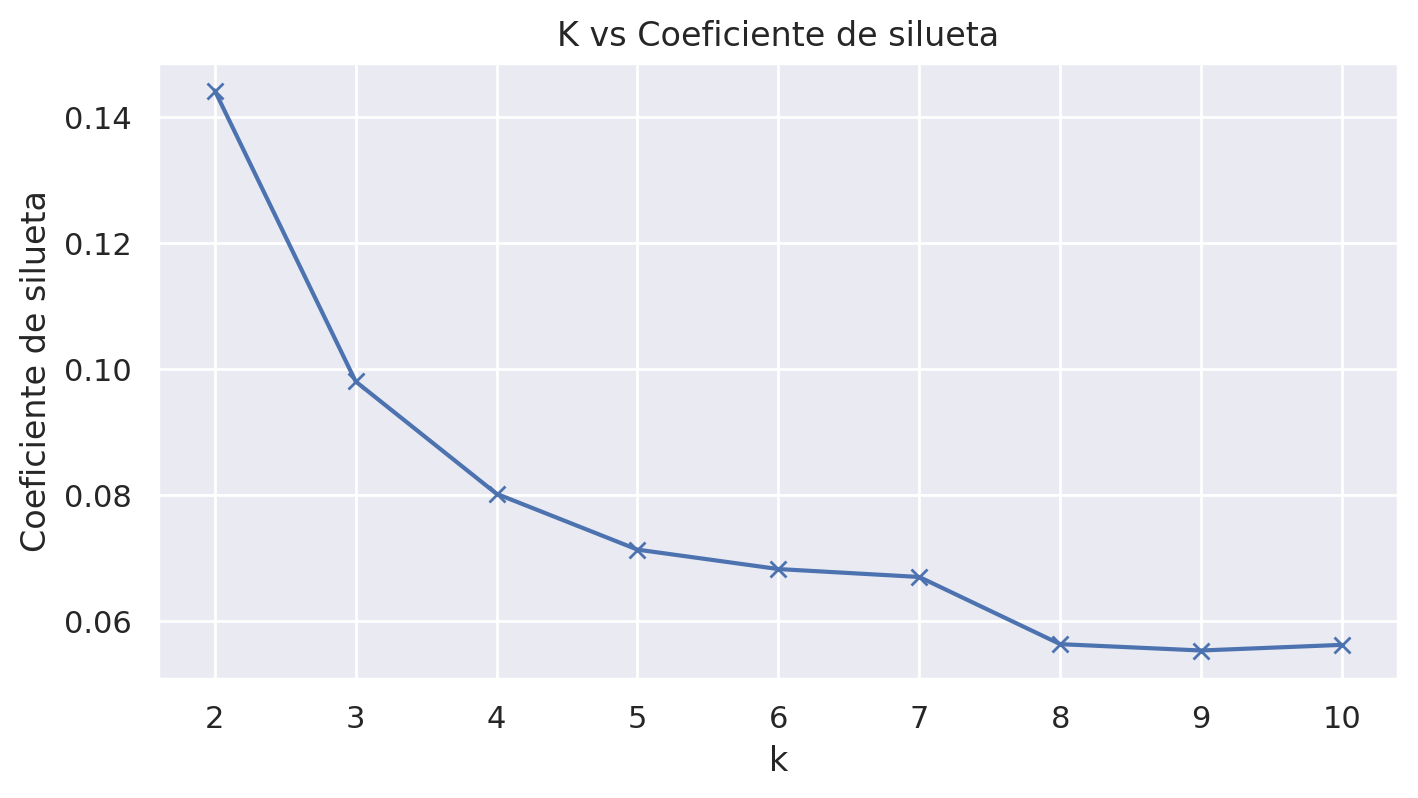

In [ ]:
#TEST_CELL
#@markdown **Celda de pruebas**: Ejecute esta celda para probar de forma gráfica el resultado obtenido en la celda anterior.
try:
  plt.figure(dpi=100, figsize=(8, 4))
  plt.plot(K, silhouette, 'bx-')
  plt.xticks(K)
  plt.xlabel('k')
  plt.ylabel('Coeficiente de silueta')
  plt.title(f'K vs Coeficiente de silueta')
  plt.show()
except Exception as e:
  print("El valor retornado no es válido. Asegúrese de obtener una respuesta correcta y de ejecutar la celda de prueba anterior antes de ejecutar esta celda.")

**Salida esperada:**

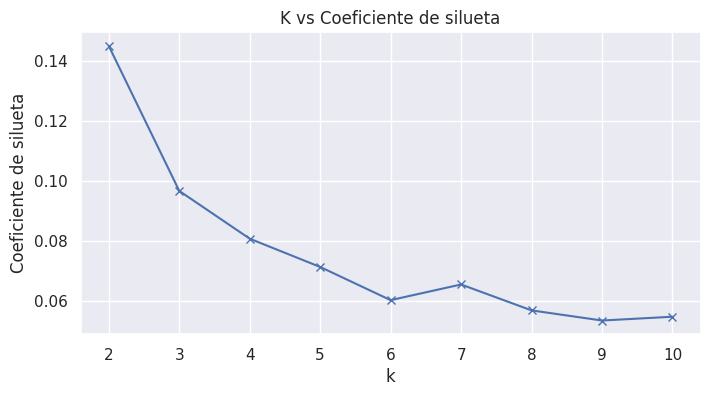

> **Pregunta**: ¿Qué valor de $k$ escogería?

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

* Itere sobre cada valor de **`K`** con un bucle **`for`**, entrene un modelo por cada **`k`** y guarde los resultados en una lista.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

* Obtenga el coeficiente de silueta de un modelo determinado con el método **`silhouette_score`** del módulo **`metrics`**.


## **6. Realice evaluación del desempeño externa con el índice de Rand.**
---
Dado que tenemos a nuestro alcance las categorías reales de la clasificación, podemos realizar un experimento de evaluación del desempeño de manera externa.

En esta ocasión vamos a realizar un experimento análogo al del ejercicio $4$, evaluando el desempeño por medio del índice ajustado de _Rand_.

Complete la función **`experimento_rand`** de tal manera que reciba los datos preprocesados (**`X`**), un iterable con los valores de $k$ a explorar (**`K`**) y una semilla aleatoria **`seed`** para la construcción de los modelos **`KMeans`**, y retorne una lista o arreglo con los $n_k$ índices ajustados de _Rand_ obtenidos del agrupamiento de cada uno de los modelos.


**Entrada:**
* **`X`**: arreglo sparse de _SciPy_ o regular de _NumPy_ con tamaño $(n, m)$ con valores numéricos.
* **`y`**: arreglo de _NumPy_ de tamaño $(n, )$ con las etiquetas reales del conjunto de datos.
* **`K`**: colección ordenada (lista, tupla o arreglo de _NumPy_) de números enteros de tamaño $n_k$ usado como el hiperparámetro $k$ del modelo $k$-_means_.
* **`seed`**: número real con la semilla aleatoria para la declaración y ejecución del modelo **`KMeans`**.

**Salida:**
* **`rand`** colección ordenada (lista, tupla o arreglo de _NumPy_) de números reales correspondientes al índice ajustado de _Rand_ del modelo **`KMeans`** entrenado en cada iteración.

In [ ]:
# FUNCIÓN CALIFICADA experimento_silueta:

# Funciones utilizadas en el ejercicio.
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

def experimento_rand(X, y, K,
# ¡No modifique los valores por defecto de los argumentos!
                        seed = 481):
  """
  Entradas:
    X: arreglo sparse de SciPy o regular de NumPy con el conjunto
                de datos preprocesado para realizar agrupamiento.
    y: arreglo de NumPy con las etiquetas preprocesadas del conjunto de datos.
    K: iterable con los valores de k para probar.
    seed: semilla aleatoria para KMeans.
  Retorna:
    rand: iterable con el coeficiente ajustado de Rand de los agrupamientos resultantes.
  """
  ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 5 - 6 líneas de código)

  rand = []

  for i in K:
    # Ejemplos que pertenecen al i-esimo grupo.
    km = KMeans(n_clusters=i, random_state=seed)
    km = km.fit(X)
    y1 = km.predict(X)
    rand.append(adjusted_rand_score(y, y1))

  ### FIN DEL CÓDIGO ###
  return rand

In [ ]:
#TEST_CELL

# 1. Separar el conjunto de datos en la forma X, y.
X_raw, y_raw = separar_X_y(credit_german_df)
assert (isinstance(X_raw, pd.DataFrame) and isinstance(y_raw, pd.Series)
      and X_raw.shape == (1000, 18) and y_raw.shape == (1000, )), "Ej 1. Revise el resultado del ejercicio 1."

# 2. Codificación de las etiquetas en valores binarios
y = codificar(y_raw)
assert isinstance(y, np.ndarray) and y.shape[0] > 0, "Ej 2. Revise el resultado del ejercicio 2."

# 3. Preprocesamiento de la matriz de entrada.
X, _ = preprocesar(X_raw)
assert isinstance(X, scipy.sparse.csr.csr_matrix) and X.shape[1] > X_raw.shape[1], "Ej 3. Revise el resultado del ejercicio 3."

K = np.arange(2, 11)
rand = experimento_rand(X, y, K)

try:
  print(np.round(rand, 4))
except Exception as e:
  print(e)
  print("El valor retornado no es un iterable válido.")

[0.0706 0.0235 0.0126 0.0101 0.0126 0.0118 0.0141 0.021  0.0135]


**Salida esperada:**

```
[0.0706 0.0224 0.0129 0.0105 0.012  0.02   0.0129 0.0157 0.0106]
```

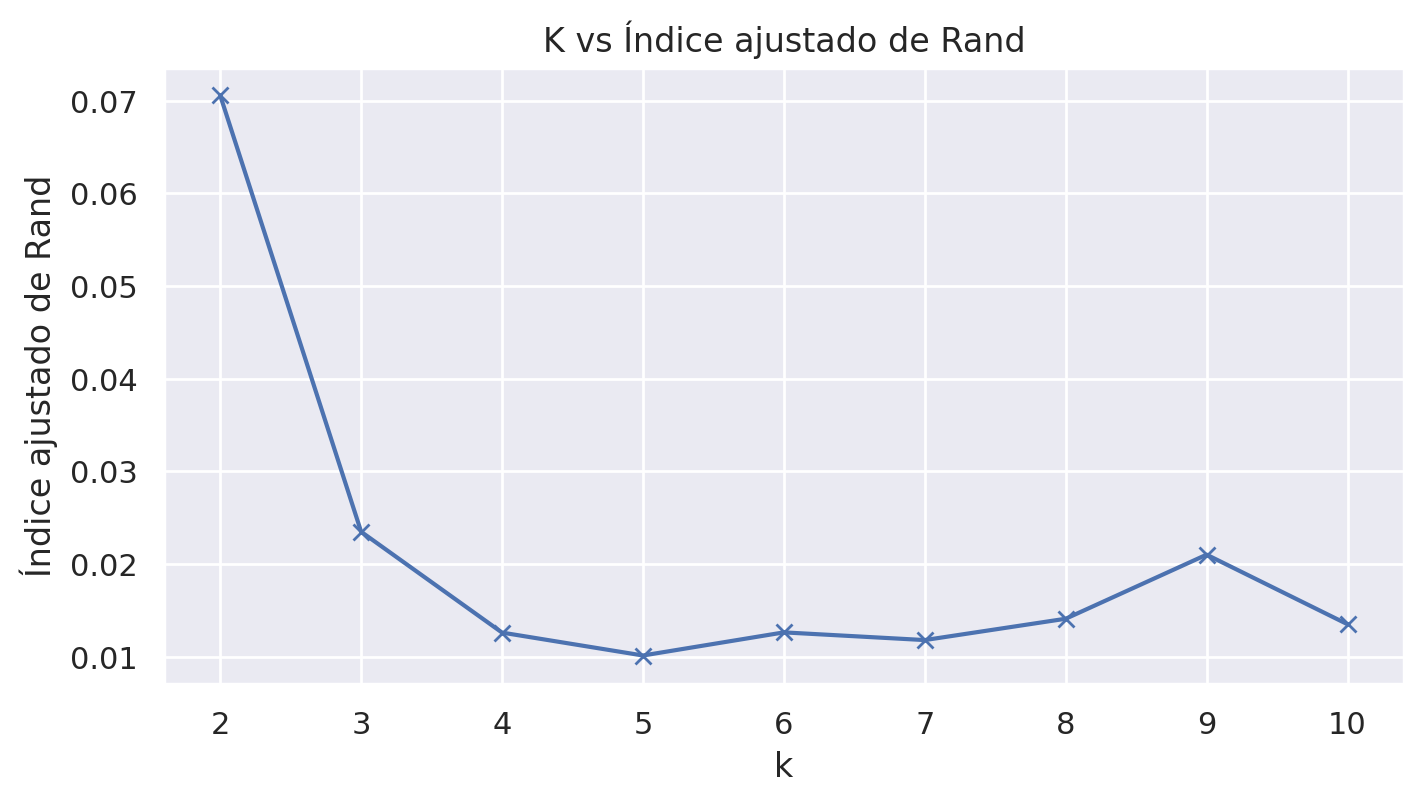

In [ ]:
#TEST_CELL
#@markdown **Celda de pruebas**: Ejecute esta celda para probar de forma gráfica el resultado obtenido en la celda anterior.
try:
  plt.figure(dpi=100, figsize=(8, 4))
  plt.plot(K, rand, 'bx-')
  plt.xticks(K)
  plt.xlabel('k')
  plt.ylabel('Índice ajustado de Rand')
  plt.title(f'K vs Índice ajustado de Rand')
  plt.show()
except Exception as e:
  print("El valor retornado no es válido. Asegúrese de obtener una respuesta correcta y de ejecutar la celda de prueba anterior antes de ejecutar esta celda.")

**Salida esperada:**

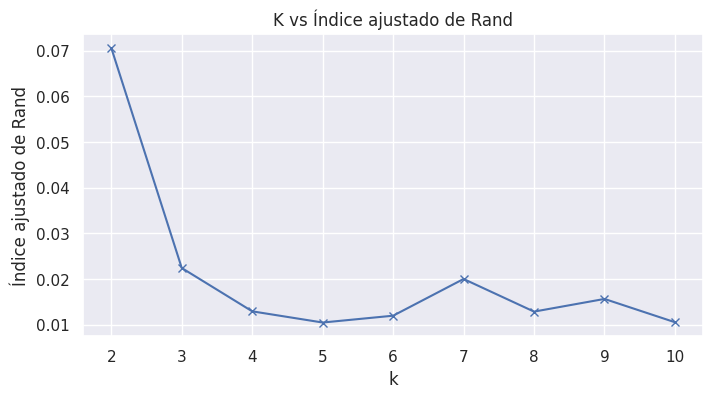

> **Pregunta**: ¿Qué valor de $k$ escogería?

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

* Itere sobre cada valor de **`K`** con un bucle **`for`**, entrene un modelo por cada **`k`** y guarde los resultados en una lista.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

* Obtenga el índice de _Rand_ de un modelo determinado con el método **`ajusted_rand_score`** del módulo **`metrics`**.


## **7. Interprete los centroides de cada grupo**
---
Con el objetivo de interpretar el agrupamiento encontrado, nos interesa inspeccionar los elementos representativos o centroides de cada grupo e  interpretar los valores promedio por variable obtenidos.

Complete la función **`centroides`** de tal manera que reciba un modelo **`KMeans`** entrenado, un número entero **`col`** y un número entero **`group`** que representen la posición de la variable en la que estamos interesado y el índice del grupo a explorar.

La función debe retornar el valor de la variable ubicada en la posición **`col`** del **`group`**-ésimo grupo.

**Entrada:**

* **`model`**: modelo de agrupamiento **`KMeans`** ajustado sobre **`X`**.
* **`group`**: número entero con el índice del grupo sobre el cual calcular el centroide.
* **`col`**: número entero con el índice de la columna del arreglo **`X`** correspondiente a la variable en la cual estamos interesados.

**Salida:**

* **`centroid`**: número real con el valor de la variable **`col`** del centroide del grupo **`group`** obtenido del modelo **`model`**.


In [ ]:
# FUNCIÓN CALIFICADA centroides:

def centroides(model, group, col):
  """
  Entrada:
    model: modelo KMeans ajustado a los datos.
    group: número entero con el índice del centroide.
    col:   número entero con el índice de la variable del centroide.
  Retorna:
    centroid: número real con el valor de la variable 'col' del centroide 'group'.
  """
  ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 3-4 líneas de código)

  centroid = []

  for centroidd in model.cluster_centers_:
    centroid_copy = centroidd.copy()
    centroid.append(centroid_copy)

  ### FIN DEL CÓDIGO ###
  return centroid[group][col]

Para evaluar el resultado de la función, vamos a inspeccionar los valores de dos variables para cada centroide. Estas son:

- **`radio/tv`** (ubicada en la columna $15$) es uno de los valores posibles de la característica categórica **`purpose`**. Debido a que se realizó _One Hot Encoding_ de todas las características categóricas, la característica **`radio/tv`** de un centroide corresponde a el porcentaje de personas del grupo que pidieron un crédito para comprar una radio o una televisión.


Use la siguiente celda para probar su código:

In [ ]:
#TEST_CELL

# 1. Separar el conjunto de datos en la forma X, y.
X_raw, y_raw = separar_X_y(credit_german_df)
assert (isinstance(X_raw, pd.DataFrame) and isinstance(y_raw, pd.Series)
      and X_raw.shape == (1000, 18) and y_raw.shape == (1000, )), "Ej 1. Revise el resultado del ejercicio 1."

# 2. Codificación de las etiquetas en valores binarios
y = codificar(y_raw)
assert isinstance(y, np.ndarray) and y.shape[0] > 0, "Ej 2. Revise el resultado del ejercicio 2."

# 3. Preprocesamiento de la matriz de entrada.
X, tf = preprocesar(X_raw)
assert (isinstance(X, scipy.sparse.csr.csr_matrix) and
       (X.shape[1] > X_raw.shape[1]) and
       isinstance(tf, sklearn.compose._column_transformer.ColumnTransformer
       )), "Ej 3. Revise el resultado del ejercicio 3."

k = 2
model = KMeans(n_clusters= k, random_state=24)
model.fit(X)

try:
  print('Grupo \t radio/tv')
  for i in range(2):
    print(f'{i} \t {centroides(model, i, 15):.5f}' )
except Exception as e:
  print(e)
  print("El valor retornado no es un iterable válido.")

Grupo 	 radio/tv
0 	 0.31191
1 	 0.18577


**Salida esperada**:

```
Grupo 	 radio/tv
0 	     0.31191
1 	     0.18577
```

La segunda variable es:
- **`disc_duration`** (ubicada en la columna $60$) corresponde a la duración del crédito en meses. De esta manera, el valor de **`disc_duration`** de un centroide corresponde a la media de este valor para los ejemplos del grupo relacionado. Sin embargo, dado que los datos fueron reescalados en el preprocesamiento el valor mostrado no corresponde al valor real de la media. Para corregir esto, podemos utilizar el transformador **`StandarScaler`** usado en el proceso para obtener el valor en su escala original de la siguiente forma:

  ```python
  centroide = centroides(model, i, 60)
  scaler = tf.named_transformers_['scaler']
  centroide_original = scaler.inverse_transform([[centroide, 0, 0]])[0, 0]
```

Use la siguiente celda para probar su código:

In [ ]:
#TEST_CELL

# 1. Separar el conjunto de datos en la forma X, y.
X_raw, y_raw = separar_X_y(credit_german_df)
assert (isinstance(X_raw, pd.DataFrame) and isinstance(y_raw, pd.Series)
      and X_raw.shape == (1000, 18) and y_raw.shape == (1000, )), "Ej 1. Revise el resultado del ejercicio 1."

# 2. Codificación de las etiquetas en valores binarios
y = codificar(y_raw)
assert isinstance(y, np.ndarray) and y.shape[0] > 0, "Ej 2. Revise el resultado del ejercicio 2."

# 3. Preprocesamiento de la matriz de entrada.
X, tf = preprocesar(X_raw)
assert (isinstance(X, scipy.sparse.csr.csr_matrix) and
       (X.shape[1] > X_raw.shape[1]) and
       isinstance(tf, sklearn.compose._column_transformer.ColumnTransformer
       )), "Ej 3. Revise el resultado del ejercicio 3."

k = 2
model = KMeans(n_clusters= k, random_state=24)
model.fit(X)
try:
  print('Grupo \t disc_duration \t disc_duration (escala original)')
  for i in range(2):
    centroide = centroides(model, i, 60)
    scaler = tf.named_transformers_['scaler']
    centroide_original = scaler.inverse_transform([[centroide, 0, 0]])[0, 0]
    print(f'{i} \t {centroide:.5f} \t {centroide_original:.5f}' )
except Exception as e:
  print(e)
  print("El valor retornado no es un iterable válido.")

Grupo 	 disc_duration 	 disc_duration (escala original)
0 	 -0.42490 	 15.78179
1 	 1.25454 	 36.02372


**Salida esperada**:

```
Grupo 	 disc_duration 	 disc_duration (escala original)
0 	     -0.42490 	      15.78179
1 	     1.25454 	       36.02372
```

> **Pregunta:** ¿Puede encontrar información importante en estos centroides?

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

* Puede obtener los centroides de un modelo $k$-_means_ entrenado con el atributo **`cluster_centers_`**. Obtenga una copia de ese arreglo y retorne el valor ubicado en el índice **`group, col`**.